In [ ]:
# env set up:  https://classroom.udacity.com/courses/ud120/lessons/2254358555/concepts/30199885720923

In [1]:
import sys
import pickle
import math
import matplotlib.pyplot


In [2]:
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data

/Users/kelleymantione/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data_dict = pickle.load(open("final_project_dataset.pkl", "rb") )

In [4]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [5]:
# check for outliers
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
data

array([[  3.65788000e+05,   6.00000000e+05],
       [  2.67102000e+05,   1.20000000e+06],
       [  1.70941000e+05,   3.50000000e+05],
       [  2.43293000e+05,   1.50000000e+06],
       [  2.67093000e+05,   3.25000000e+05],
       [  3.70448000e+05,   2.60000000e+06],
       [  3.74125000e+05,   1.15000000e+06],
       [  1.97091000e+05,   4.00000000e+05],
       [  1.30724000e+05,   0.00000000e+00],
       [  2.48546000e+05,   8.50000000e+05],
       [  2.57486000e+05,   7.00000000e+05],
       [  2.88542000e+05,   1.20000000e+06],
       [  2.51654000e+05,   1.10000000e+06],
       [  2.88558000e+05,   2.50000000e+05],
       [  6.37440000e+04,   0.00000000e+00],
       [  3.57091000e+05,   8.50000000e+05],
       [  2.71442000e+05,   3.10000000e+06],
       [  3.04110000e+05,   2.00000000e+06],
       [  1.87922000e+05,   2.50000000e+05],
       [  2.13625000e+05,   1.00000000e+06],
       [  2.49201000e+05,   7.00000000e+05],
       [  2.31330000e+05,   7.00000000e+05],
       [  

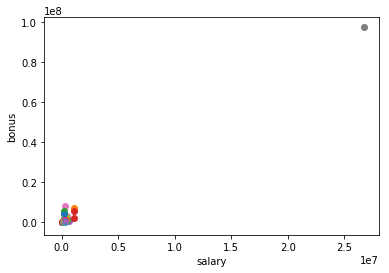

In [6]:

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [7]:
# we have an outlier, look at enroninsider.pdf to see which one it is, then remove

In [8]:
#From the plot done above, see that we need to remove the "TOTAL" key that is part of the insiderpay.pdf
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [9]:
#Examine features, try different feature list.  This is iterative process.  Label must be first
# My need to create new feature eventually
features_list = ['poi','total_payments','exercised_stock_options','shared_receipt_with_poi']

In [10]:
# Extract features and labels from dataset for local testing
#replaces NaN with 0


data = featureFormat(data_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
print ("using SelectKBest for feature selection")
features = SelectKBest(f_classif, k=2).fit_transform(features, labels)

using SelectKBest for feature selection


In [12]:
#split data into test & train
from sklearn import cross_validation
features_train,features_test,labels_train,labels_test = cross_validation.train_test_split(features,labels,test_size=0.3,random_state=42)

In [13]:
### Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [17]:
#Decision Tree
from sklearn import tree
from sklearn.grid_search import GridSearchCV
#best so far
print ("using DecisionTree")
clf = tree.DecisionTreeClassifier()

using DecisionTree


/Users/kelleymantione/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
#Naive-Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  

In [17]:
#SVM
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=1e-05,gamma=0.0001, class_weight={1:100})


In [18]:
clf=clf.fit(features_train, labels_train)

In [19]:
# how did we do
# tune your classifier to achieve better than .3 precision and recall

#accuracy
acc = clf.score(features_test, labels_test)
print ("accuracy is : " + str(acc))
predicted_labels=clf.predict(features_test)

#precision, recall
from sklearn.metrics import precision_score
ps = precision_score(labels_test, predicted_labels)
print ("precision is : " + str(ps))

from sklearn.metrics import recall_score
rs = recall_score(labels_test, predicted_labels)
print ("recall is : " + str(rs))

accuracy is : 0.093023255814
precision is : 0.093023255814
recall is : 1.0


In [20]:
test_classifier(clf, data_dict, features_list)

SVC(C=1e-05, cache_size=200, class_weight={1: 100}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.13333	Precision: 0.13333	Recall: 1.00000	F1: 0.23529	F2: 0.43478
	Total predictions: 15000	True positives: 2000	False positives: 13000	False negatives:    0	True negatives:    0

